In [13]:



import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv("car_insurance.csv")
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,0,1,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,0,0,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,0,1,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,1,1,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


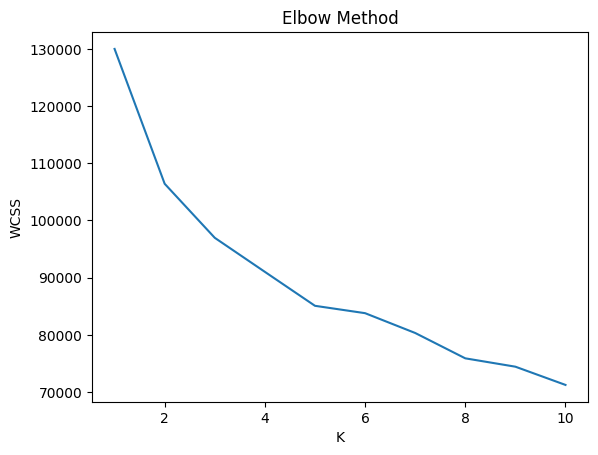

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome,Cluster
0,569520,3,0,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0,1
1,750365,0,1,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1,0
2,199901,0,0,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0,0
3,478866,0,1,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0,0
4,731664,1,1,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1,0


In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Remove rows with NaN
numeric_df = numeric_df.dropna()

# Scale
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Fit final model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

df["Cluster"] = clusters
df.head()


In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  int64  
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  int64  
 10  children             10000 non-null  int64  
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [4]:
numeric_df = df.select_dtypes(include=['int64','float64'])
numeric_df.head()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0.629027,1,0,1,10238,12000.0,0,0,0,0
1,750365,0,1,0.357757,0,0,0,10238,16000.0,0,0,0,1
2,199901,0,0,0.493146,1,0,0,10238,11000.0,0,0,0,0
3,478866,0,1,0.206013,1,0,1,32765,11000.0,0,0,0,0
4,731664,1,1,0.388366,1,0,0,32765,12000.0,2,0,1,1


In [6]:
# ---------------------------
#  FIX MISSING VALUES
# ---------------------------

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Fill missing values with column mean
numeric_df = numeric_df.fillna(numeric_df.mean())

# Update df numeric values
df[numeric_df.columns] = numeric_df

numeric_df.head()


,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0.629027,1,0,1,10238,12000.0,0,0,0,0
1,750365,0,1,0.357757,0,0,0,10238,16000.0,0,0,0,1
2,199901,0,0,0.493146,1,0,0,10238,11000.0,0,0,0,0
3,478866,0,1,0.206013,1,0,1,32765,11000.0,0,0,0,0
4,731664,1,1,0.388366,1,0,0,32765,12000.0,2,0,1,1


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 5 Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

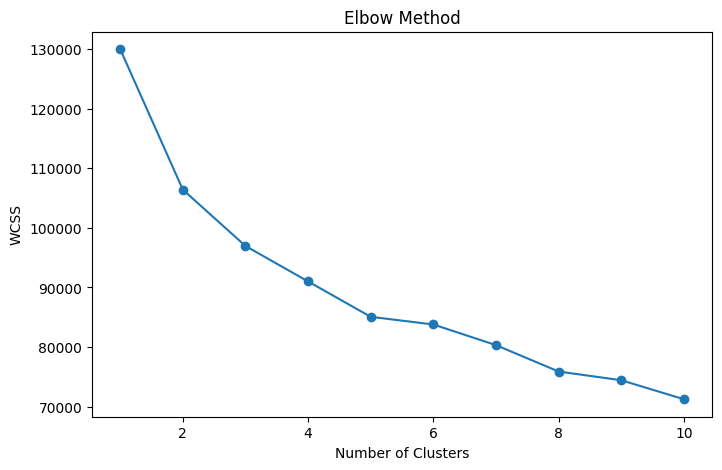

In [10]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()



In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome,Cluster
0,569520,3,0,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0,1
1,750365,0,1,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1,0
2,199901,0,0,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0,0
3,478866,0,1,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0,0
4,731664,1,1,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1,0
